# `ospgrid` Educational

This tutorial illustrates some of the features that make `ospgrid` useful for education.

We start with the usual imports...


In [1]:
# This cell not necessary once ospgrid is installed
import sys
sys.path.append("../../..")

In [2]:
# Basic imports
import ospgrid as ospg  # The main package
from IPython import display  # For images in this notebook

Let's use the grid from Example 1 of the Introduction tutorial, repeated here for convenience:

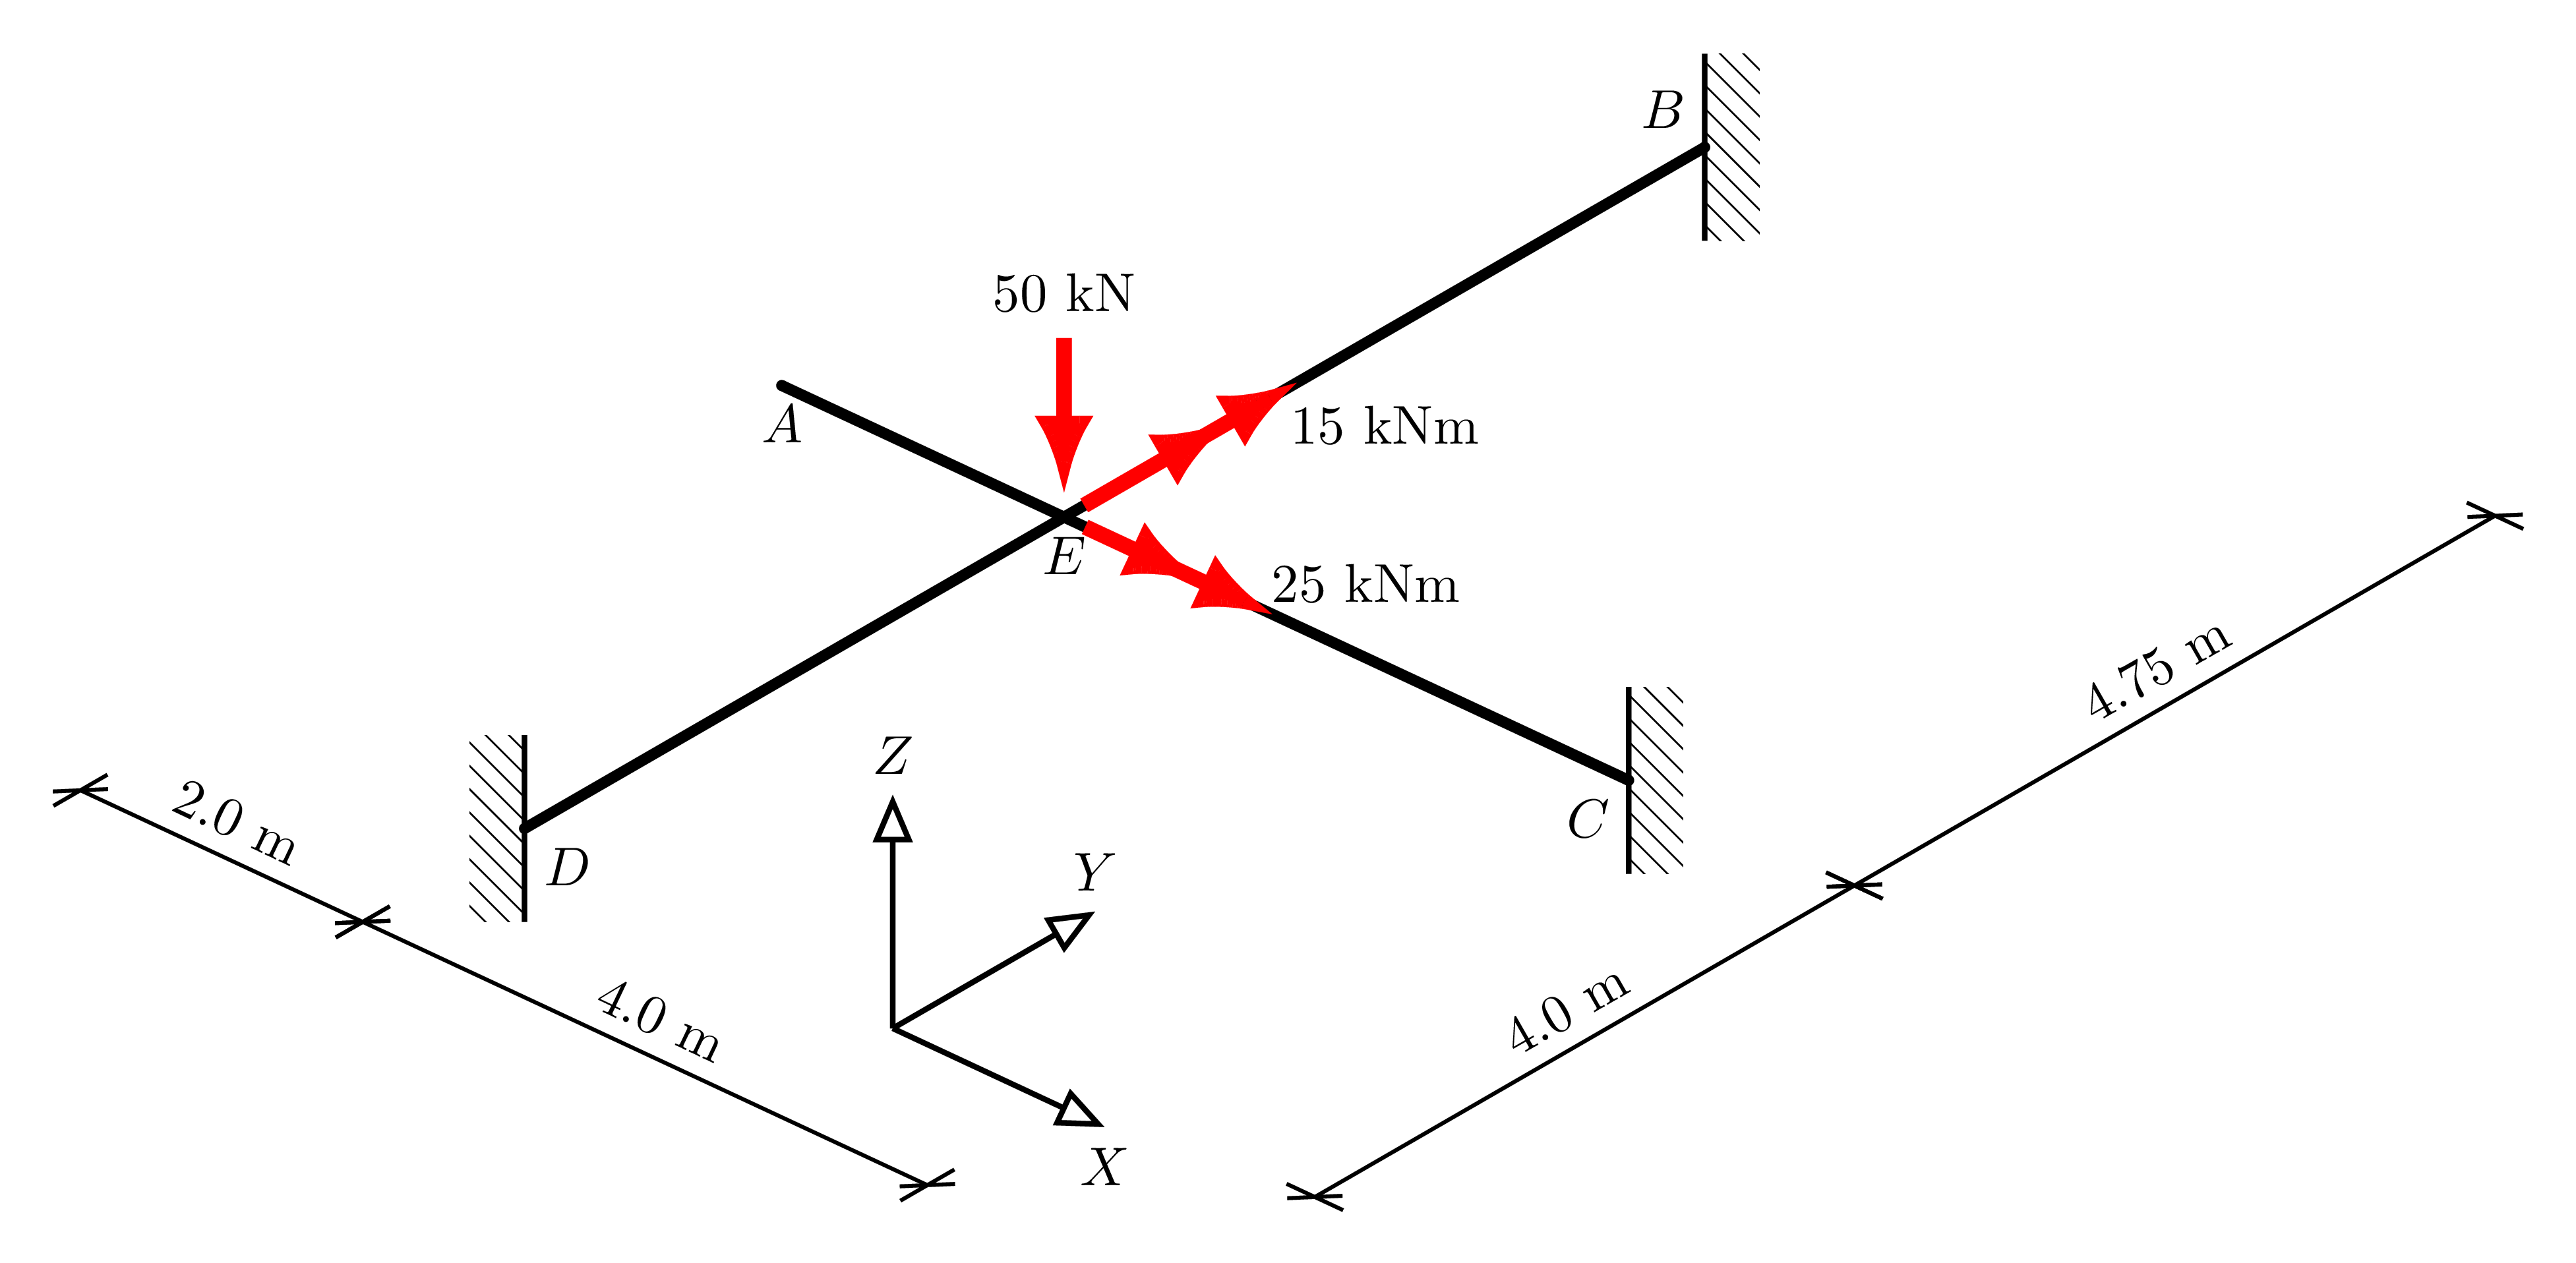

In [3]:
display.Image("./images/intro_ex_1.png",width=800)

And quickly build the grid (see the Introduction tutorial for details):

In [4]:
grid = ospg.Grid()

grid.add_node("A", -2.0, 0.0)
grid.add_node("B", 0.0, 4.75)
grid.add_node("C", 4.0, 0.0)
grid.add_node("D", 0.0, -4.0)
grid.add_node("E", 0.0, 0.0)

EI = 10e3
GJ = 5e3
grid.add_member("A", "E", EI, GJ)
grid.add_member("B", "E", EI, GJ)
grid.add_member("C", "E", EI, GJ)
grid.add_member("D", "E", EI, GJ)

grid.add_load("E", Fz=-90, Mx=30, My=60)

grid.add_support("B", ospg.Support.FIXED)
grid.add_support("C", ospg.Support.FIXED)
grid.add_support("D", ospg.Support.FIXED)

ops = grid.analyze()

Now the grid is analyzed and stored, we can examine aspects that should match the theory or a calculation.

## Member Forces

Similarly to the stiffness matrix, we can get the member end forces for the member. Note that with 6 DOFs per node, this is a $12\times1$ vector, with the $i$-node and $j$-node as created (not necessarily as passed in the tuple):

In [5]:
Fbe = grid.get_member_forces(("E", "B"))
print(Fbe)

[0.0, 0.0, 20.155184539095423, -48.84891084428332, 0.9967472446340149, 0.0, 0.0, 0.0, -20.155184539095423, -46.88821571641994, -0.9967472446340149, 0.0]


## Global Stifness Matrix
We can extract the reudced global stiffness matrix (i.e. after the boundary conditions have been applied). For this grid, only nodes $A$ and $E$ can move, and all 6 DOFs are free at each, so we will have a $12\times12$ matrix.

The DOFs are in the order translation about the $x$-, $y$-, and $z$-axes, and rotation about the $x$-, $y$-, and $z$-axes.

Note that the 6 DOFs per node here are those for a general 3D frame structure. For grids, we will know that the translations in $x$ and $y$, and the rotation about $z$ will be zero.

In [6]:
K = grid.get_system_stiffness()

## Member Stiffness Matrix

The member stiffness matrix for a grid element (omitting the rows and columns corresponding to translations in $x$ and $y$ and rotation about $z$) is:

$$ 
k = 
\left[
\begin{array}{cccccc}
\dfrac{12EI}{L^3} & 0 & \dfrac{6EI}{L^2}& \dfrac{-12EI}{L^3}&0 & \dfrac{6EI}{L^2} \\[10pt]
0 & \dfrac{GJ}{L} & 0 & 0 & \dfrac{-GJ}{L} & 0  \\[10pt]
\dfrac{6EI}{L^2} & 0 & \dfrac{4EI}{L} &  \dfrac{-6EI}{L^2}&0 & \dfrac{2EI}{L} \\[10pt]
\dfrac{-12EI}{L^3} & 0 & \dfrac{-6EI}{L^2} & \dfrac{12EI}{L^3}&0 & \dfrac{-6EI}{L^2} \\[10pt]
0 & \dfrac{-GJ}{L} & 0 & 0 & \dfrac{GJ}{L} & 0  \\[10pt]
\dfrac{6EI}{L^2} & 0 &  \dfrac{2EI}{L}  &  \dfrac{-6EI}{L^2}&0&  \dfrac{4EI}{L} \\[10pt]
\end{array}
\right]
$$

And we can find this by passing a tuple of the two node labels (or member ID, or member object):

In [7]:
k_eb = grid.get_member_stiffness(("E", "B"))
print(k_eb)

[[ 1119.6967488      0.          2659.27977839 -1119.6967488
      0.          2659.27977839]
 [    0.          1052.63157895     0.             0.
  -1052.63157895     0.        ]
 [ 2659.27977839     0.          8421.05263158 -2659.27977839
      0.          4210.52631579]
 [-1119.6967488      0.         -2659.27977839  1119.6967488
      0.         -2659.27977839]
 [    0.         -1052.63157895     0.             0.
   1052.63157895     0.        ]
 [ 2659.27977839     0.          4210.52631579 -2659.27977839
      0.          8421.05263158]]
